In [1]:
# dataframe
import pandas as pd
import numpy as np

# logistic regression
from sklearn.linear_model import LogisticRegression

# train/test split
from sklearn.model_selection import train_test_split

# confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
# config file
pd.set_option('display.max_columns', 100)
from pyaml_env import parse_config
config = parse_config('config.yaml')


In [34]:
# load dataset, filter to feature columns
df = pd.read_pickle('data/generated_games.pkl')
feature_col = [str(x) + '_team' for x in config['scoring_ranges'].keys()]
target_col = config['target_variable']

In [35]:
df.head(1)

,game_id,a1_team,a1_goals,a2_team,a2_goals,a3_team,a3_goals,b1_team,b1_goals,b2_team,b2_goals,b3_team,b3_goals,c1_team,c1_goals,c2_team,c2_goals,d1_team,d1_goals,d2_team,d2_goals,score_difference,team1_victory
0,1,1,1,0,2,0,2,1,1,1,0,1,1,1,-1,0,0,0,-2,0,-2,2,1


In [36]:
df_base = df[feature_col]
df_target = df[target_col]

In [40]:
# train/test split with set state
x_train, x_test, y_train, y_test = train_test_split(df_base, df_target, test_size=0.25, random_state=0)

## Logistic Regression

In [56]:
# default logistic regression
model = LogisticRegression()

In [57]:
# training
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
# predict on test
y_pred = model.predict(x_test)

In [59]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[12  0]
 [ 2 11]]


Text(0.5, 427.9555555555555, 'Predicted label')

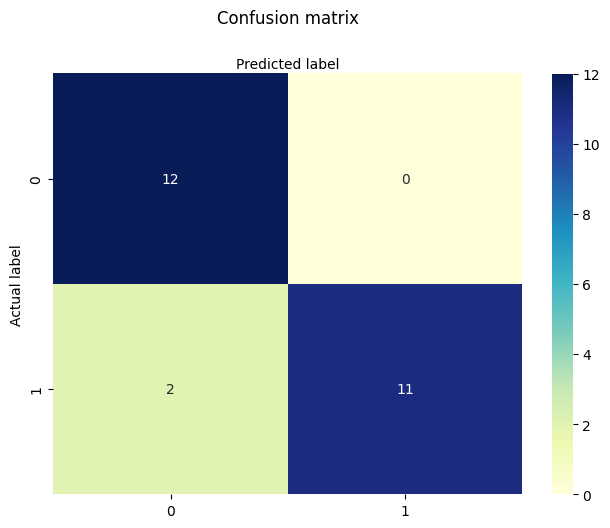

In [60]:
# Better looking confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

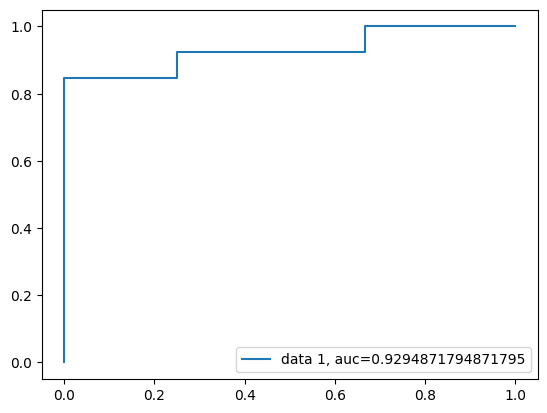

In [61]:
# ROC curve
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

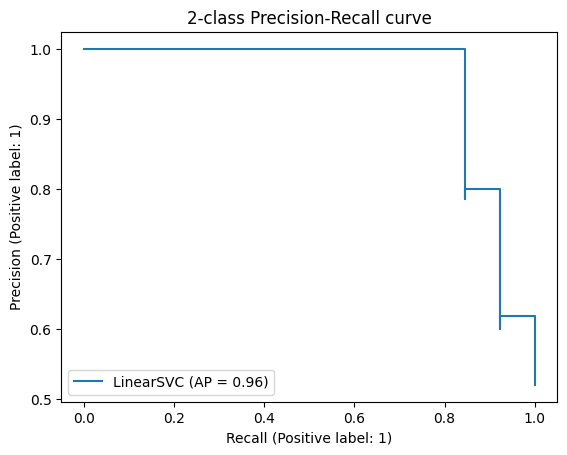

In [62]:
display = metrics.PrecisionRecallDisplay.from_estimator(
    model, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [63]:
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 1.000000
Recall: 0.846154
F1 score: 0.916667


In [64]:
feat_importance = pd.DataFrame(data={
    'Player': x_train.columns,
    'Weight': model.coef_[0]
})
feat_importance = feat_importance.sort_values(by='Weight', ascending=False)

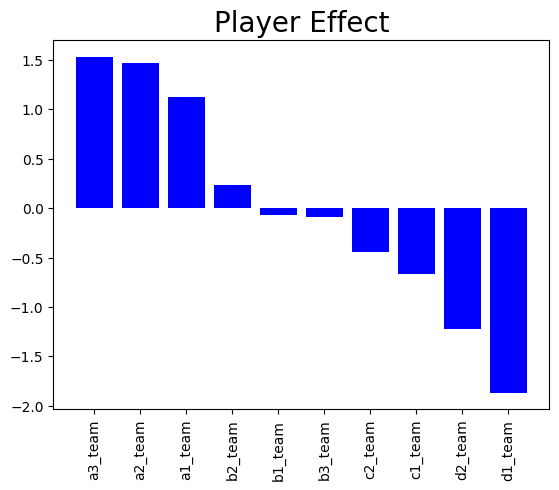

In [66]:
plt.bar(x=feat_importance['Player'], height=feat_importance['Weight'], color='blue')
plt.title('Player Effect', size=20)
plt.xticks(rotation='vertical')
plt.show()

## XGBoost